In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

import time

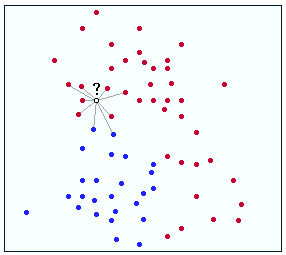

In [6]:
from IPython.display import Image
path = "/Users/minkyukwon/Desktop/hl_knn.png"
Image(filename=path, width=500)

# sklearn 에서 MNIST  Full DataSet 얻어서 하기 
* 참고) 인터넷에서 간략하게 데이터를 얻어서 할 수 있으나, 데이터의 양이 적음. 물론 적은 시간 동안에 알고리즘 확인을 위해서는 간략한 데이터로 받아서 하고, 전체에 대해서 하고 싶으면 전체를 얻어서 할 것!
* 참고) http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

* Full Version : 필요한 패키지 : fetch_mldata
* 데이터의 구성이 .data, .target 이렇게 되어 있으며, 전체 데이터에 대해서 하는 것이기 때문에 Kaggle과 달리 직접 train/ test를 나누어야 한다. 
> from sklearn.cross_validation import train_test_split

In [2]:
# Edited _2020_06
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [4]:
# edited 
from sklearn.model_selection import train_test_split

In [6]:
### 정상적으로 동작될 때...
~~~~~~~~  데이터 분리하기 수행 ~~~~~~

(train_data,test_data,train_labels,test_labels) = train_test_split(
    np.array(mnist.data), mnist.target,
    test_size=0.25,
    random_state=1234)


#test_size =0.25
#random_state=1234

#갯수확인하기
print (len(train_data))
print (len(test_data))

############
#52500
#17500

52500
17500


In [10]:
train_data #2차원Array
train_data[0]
len(np.unique(train_labels)) #정답지에 10개의 문제가 있다


10

#### 종류가 각각 몇개있는지 확인#균일하게 분포하고있는가

cat, counts = np.unique(train_labels, return_counts=True)

In [14]:
cat, counts =np.unique(train_labels, return_counts=True)  #<<---이코드는 중요함
np.asarray((cat, counts)).T

array([['0', 5247],
       ['1', 5866],
       ['2', 5235],
       ['3', 5351],
       ['4', 5081],
       ['5', 4743],
       ['6', 5199],
       ['7', 5476],
       ['8', 5148],
       ['9', 5154]], dtype=object)

# 0~9까지 데이터가 다 들어있는지 확인!
* 실제로 우리가 학습 시킬 데이터가 0~9까지 다 제대로 들어있는 데이터인지 확인

In [9]:
# pandas가 아니기 때문에 value_counts는 사용하지 못함;;;
print (np.unique(train_labels))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


# 학습 시키려는 데이터의 분포가 균일하게 적당히 분포가 되었는지 확인!!!!
[[  0.00000000e+00   5.16600000e+03]
 [  1.00000000e+00   5.89400000e+03]
 [  2.00000000e+00   5.28200000e+03]
 [  3.00000000e+00   5.28000000e+03]
 [  4.00000000e+00   5.13100000e+03]
 [  5.00000000e+00   4.74300000e+03]
 [  6.00000000e+00   5.17100000e+03]
 [  7.00000000e+00   5.50200000e+03]
 [  8.00000000e+00   5.15400000e+03]
 [  9.00000000e+00   5.17700000e+03]]

 * 위와 같은 결과가 나오는지 확인!!!(단, 방법은 여러가지임!)
 * 대략 결과를 보면 각 숫자별로 약 5000개 내외의 이미지가 할당되어있다!!!!

In [10]:
# 타겟의 유니크한 값과 그들의 수량 파악
~


[['0' 5247]
 ['1' 5866]
 ['2' 5235]
 ['3' 5351]
 ['4' 5081]
 ['5' 4743]
 ['6' 5199]
 ['7' 5476]
 ['8' 5148]
 ['9' 5154]]


# 실제 데이터 값을 이미지로 확인해보자!
* ref) http://yann.lecun.com/exdb/mnist/
* 위의 사이트에 들어가서 실제 데이터의 구성을 확인해보자!!! 실제 내용을 보면 원래 데이터는 28 X 28 크기의 이미지로 이루어진 것을 알 수 있다. 다만, 우리가 받아들이고, 데이터화 하는 과정에서 label이 부여되었고, 처리를 위해서 matrix가 아닌 28x28 크기의 1차원 어레이로 처리가 된 것을 볼 수 있다.

* 시각화 부분 : http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [16]:
import seaborn as sns

In [12]:
# 이미 앞에서 label은 분리하였으니, 순수 데이터에서 크기 부분을 확인하자!!!
# 데이터 확인


(784,)
28.0


Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

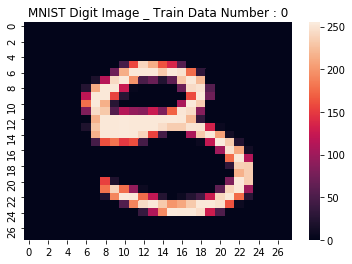

In [17]:
# 보고자 하는 데이터의 index
idx = 0

image_data = train_data[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환!!
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size)) #28 *28 =784

# 그림으로 표현
sns.heatmap(np.reshape(image_data,(one_size, one_size)))
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

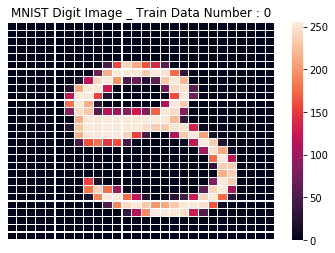

In [18]:
#seaborn의 히트맵을 활용해서!!
sns.heatmap(np.reshape(image_data,(one_size, one_size)),
           linewidth=0.1,
           xticklabels=False,
           yticklabels=False)
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

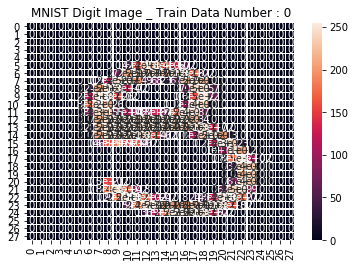

In [19]:
sns.heatmap(np.reshape(image_data,(one_size, one_size)),
           linewidth=0.1,
           xticklabels=True,
           yticklabels=True,
           annot=True)
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

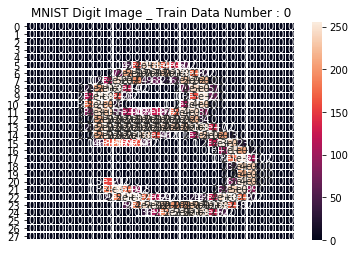

In [21]:
# 참고) xticklabels, yticklabels 중에서 하나라도 F 이면 annot 기능이 활성화 되지 않는다;;;
sns.heatmap(np.reshape(image_data,(one_size, one_size)),
           linewidth=0.1,
           xticklabels=False,
           yticklabels=True,
           annot=True)
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

# Normalization - Max/min method
* new x = (x - x_min) / (x_max - x_min)
> from sklearn.preprocessing import MinMaxScaler

중간값들을 재조정하기 위해 정규화를 이용함

In [22]:
# 필요한 패키지 불러오세요.
from sklearn.preprocessing import MinMaxScaler

In [24]:
min_max_scaler = MinMaxScaler()
train_norm = min_max_scaler.fit_transform(train_data)
test_norm = min_max_scaler.fit_transform(test_data)


# 참고로 기존에는 0~255까지의 unit8 기반이였는데, minmax 를 하게 되면은 값이 0~255가 아니라 수정이 되고, 소수 등의 형식으로 확장이 되어서  type이 변경될 수 있음!!
# /Users/minkyukwon/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler. warnings.warn(msg, _DataConversionWarning)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# 기본 분석 시작
* 참고로 데이터의 수가 많기 때문에 한 번 수행하는데 시간이 상당히 소요되니, 시간에 대한 부분을 잘 생각을 할 것!!!
* 참고) n_jobs : int, optional (default = 1)
* n_jobs 파라미터를 사용하느냐에 따라 시간에 대한 부분이 엄청나게 소진된다
 > The number of parallel jobs to run for neighbors search. If -1, then the number of jobs is set to the number of CPU cores. Doesn’t affect fit method.


In [26]:
#  KNeighborsClassifier
# accuracy_score
# cross_val_score
# 위의 3가지 패키지를 불러오세요!!
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [27]:
t1 = time.time()
# instantiate learning model (k = 3)
# n_jobs = -1 하지 않으면, 시간이 많이 걸리게 된다...!!!!! 실제에서 사용할 때에는 시간도 상당히 유의해야 함!
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# fitting the model:학습을 하기위해서는 .fit(train_data,train_labels)
knn.fit(train_data, train_labels)

# predict the response:실전문제를 풀기위해선 .predict
pred = knn.predict(test_data)

t2 = time.time()
print ("Process Time : " + str(t2-t1))

# evaluate accuracy : 모범정답과 내가 푼 정답지를 같이 입력한다.
print(accuracy_score(test_labels,pred))


Process Time : 173.1861846446991
0.9732571428571428


In [ ]:
?# 주의!! 아래 코드의 경우에는 시뮬레이션에 많은 시간이 소요된다. 그래서 최종 결과를 아래 첨부하였으나,
# 코드를 실행하면 그결과가 지워지기에 
#~~~~~!!!!주의 필요!!!!

t1 = time.time()
myList = list(range(1,50))  #k값의 리스트를 만듬

neighbors = filter(lambda x: x % 2 != 0, myList) #k 값이 홀수인 값만 선택

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    #cv: 무슨모델, 문제집, 정답지, 몇개로 쪼개서 할까?. 하면서 뭐로 평가할까?
    scores = cross_val_score(knn, train_data, train_labels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())  #정확도의 평균값을 산출해서 cv_score에 집어넣는다.
    print (scores.mean())

# changing to misclassification error
MSE = [1- x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
t2 = time.time()
print ("Process Time : " + str(t2-t1))

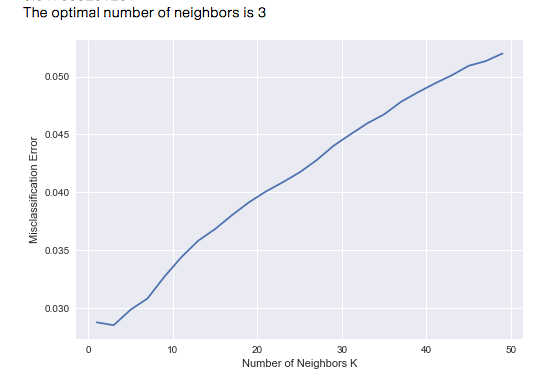

In [1]:
img_path = u"MNIST_k_simulation.png"
from IPython.display import Image
Image(filename=img_path) 

# with PCA

In [ ]:
# PCA 패키지 불러오기
from sklearn.decomposition import PCA

In [31]:
num_comp = 50
pca = PCA(n_components=num_comp)

In [32]:
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
# determine amount of variance explained by components
np.sum(pca.explained_variance_ratio_)

0.7871344381001302

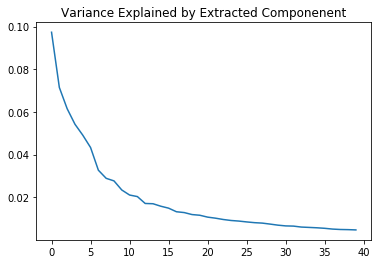

In [37]:
# plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Componenent')
plt.show()

In [38]:
# extract the features
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)

(52500, 40)


In [41]:
# transform the test data using the existing parameters
test_ext = pca.transform(test_data)
print(test_ext.shape)

(17500, 40)


* min/max scaler 준비

In [42]:
min_max_scaler = MinMaxScaler()

In [43]:
train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

In [44]:
knn = KNeighborsClassifier()
knn.fit(train_norm,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 시간 오래 걸림;;;;
cross_val_score(knn, train_norm, train_labels, cv=5)

* 위의 기본 세팅에서도 거의 97%의 결과가 나타났는데, PCA로 성분을 줄이면 오히려 더 좋은 성능이나, 적은 데이터로 유사한 성능을 확보할 수 있다.!!!

* 이와 같은 방법을 주로 사용하는 이유는 knn은 상당히 심플하면서도 성능이 좋은 알고리즘인데, 문제를 차원의 저주에 걸리면 상당한 성능저하를 야기하고 있다. 그래서 기본적으로 많은 사람들이 PCA 나 DT 등 여러가지 방법을 활용하여서 ㅏ원 축소를 하고 적용을 하는 경우가 많음!!!!